In [2]:
import pandas as pd

missing completely at random(MCAR)

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


missing data not at random(MNAR):Systematic missing values

In [27]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [29]:
df['Cabin_null'].mean()

0.7710437710437711

In [31]:
df.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

missing at random

#ALl the techniques of handling missing values

1. Mean/Median/Mode replacement
2. Random sample Imputation
3. Capture NAN values with a new feature
4. End of Distribution imputation
5. Arbitary imputation
6. Frequent categories imputation

In [37]:
#Mean/ Median/ Mode imputation
# when should we apply?
# Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
# solve this by replacing the NAN with the most frequent occurance of the variables.

In [38]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [44]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [45]:
median = df['Age'].median()

In [46]:
median

28.0

In [48]:
impute_nan(df,'Age',median)

In [49]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [51]:
df['Age_median'].std()

13.019696550973194

In [52]:
df['Age'].std()

14.526497332334044

In [53]:
import matplotlib.pyplot as plt

In [54]:
%matplotlib inline

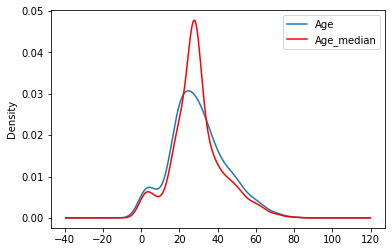

In [56]:
fig =plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [57]:
#advantages and disadvantages of mean/median imputation

##advantages
1.Easy to implement(robust to outliers)
2.Faster way to obtain the complete dataset


##disadvantages
1.Change or distortion in the original variance
2.Impacts correation

Random sample Imputation
Aim: Random sample Imputation consists of taking random observations from the dataset and use this observations to replace
     the nan values
        
when should it be used?
It assumes that the data are missing completely at random(MCAR)

In [35]:
import pandas as pd

In [60]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [63]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [66]:
df['Age'].isnull().sum()

177

In [67]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [73]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #it will have the random sample to fill the nan
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas needs to have same index in order to merge the dataset
    random_sample['index'] = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [68]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [74]:
medain = df['Age'].median()

In [75]:
impute_nan(df,'Age',median)

In [76]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22
1,1,38.0,71.2833,38.0,38
2,1,26.0,7.9250,26.0,26
3,1,35.0,53.1000,35.0,35
4,0,35.0,8.0500,35.0,35


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

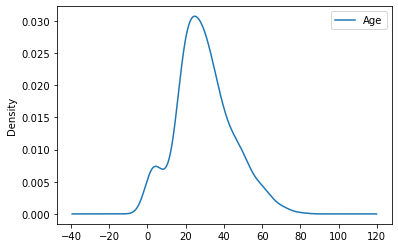

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
#df['Age_median'].plot(kind='kde',color='red',ax=ax)
#df['Age_random'].plot(kind='kde',color='red',ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

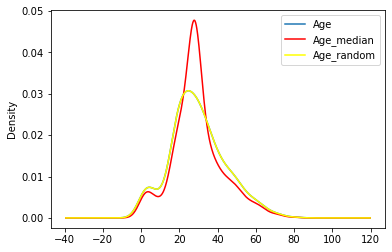

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',color='red',ax=ax)
df['Age_random'].plot(kind='kde',color='yellow',ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
#advantages
1.Easy to implement
2.There is no distortion in variance

#disadvantages
1.Every situation randomness wont work

In [90]:
#Capture NAN values with a new feature

It works well if the data are not missing completely at random

In [4]:
import numpy as np

In [10]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [12]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


advantages

1. Easy to implement
2. Captures the importance of missing values

disadvantage

1. Creating additional features(curse of dimentionality)

In [ ]:
#End of distribution imputation

In [13]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


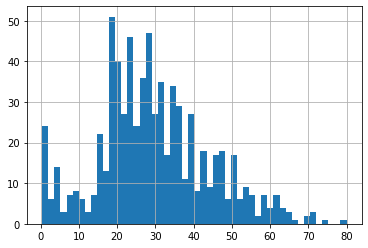

In [14]:
df['Age'].hist(bins=50)

In [19]:
extreme = df['Age'].mean()+3*df['Age'].std()

In [17]:
import seaborn as sns

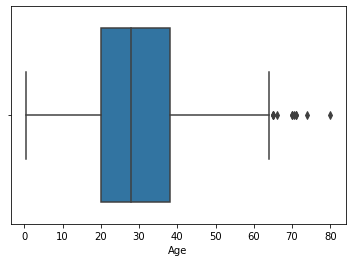

In [18]:
sns.boxplot(x='Age',data=df)

In [20]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [22]:
median = df['Age'].median()

In [23]:
impute_nan(df,'Age',median,extreme)

In [26]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


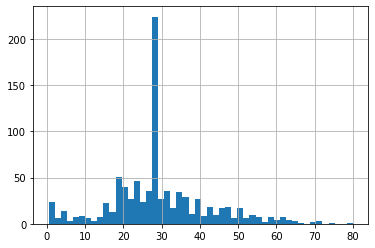

In [27]:
df['Age'].hist(bins=50)

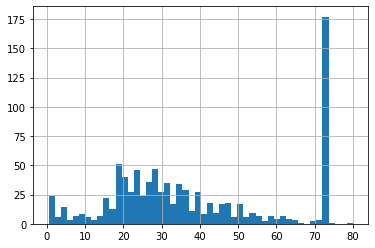

In [29]:
df['Age_end_distribution'].hist(bins=50)

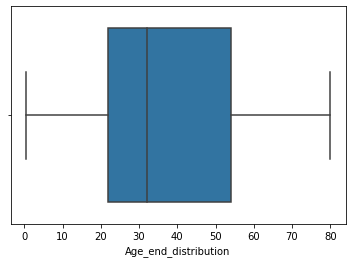

In [34]:
sns.boxplot(x='Age_end_distribution',data=df)

In [ ]:
#Arbitrary value imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value
values should be more frequently present

In [36]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
def impute_NAN(df,variable):
    df[variable+"_Zero"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)

In [43]:
impute_NAN(df,'Age')

In [44]:
df.head()

,Survived,Age,Fare,Age_hundred,Age_Zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [66]:
data = pd.read_csv("houseprice.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [67]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [59]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [51]:
#how to handle categorical missing values

#frequent category imputation

In [61]:
data.shape

(1460, 4)

In [62]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [63]:
data['BsmtQual_new'] = data['BsmtQual'].fillna('TA')

In [64]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,Gd
2,Gd,TA,Attchd,223500,Gd
3,TA,Gd,Detchd,140000,TA
4,Gd,TA,Attchd,250000,Gd


In [68]:
#compute the frequency with every feature

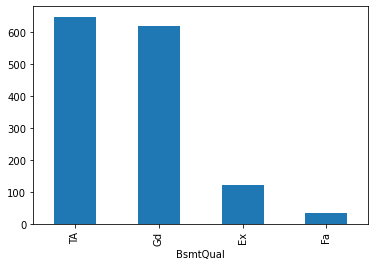

In [73]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

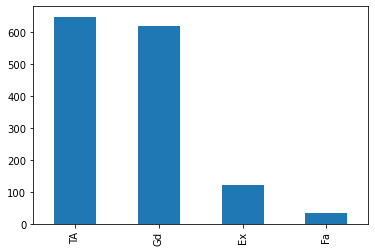

In [76]:
data['BsmtQual'].value_counts().plot.bar()

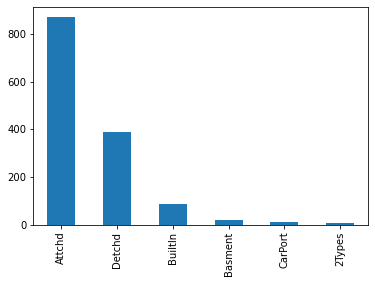

In [78]:
data['GarageType'].value_counts().plot.bar()

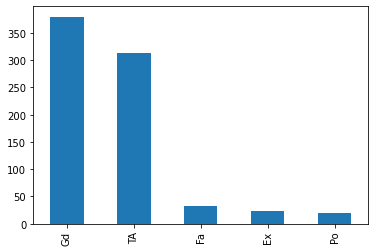

In [79]:
data['FireplaceQu'].value_counts().plot.bar()

In [97]:
def impute_nan(data,variable):
    if variable == 'BsmtQual':
        data[variable+"_BsmtQual"] = data[variable].fillna(data['BsmtQual'].value_counts().index[0])
    elif variable == 'FireplaceQu':
        data[variable+"_FireplaceQu"] = data[variable].fillna(data['FireplaceQu'].value_counts().index[0])
    else:
        data[variable+"_GarageType"] = data[variable].fillna(data['GarageType'].value_counts().index[0])

In [98]:
impute_nan(data,'FireplaceQu')

In [99]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_BsmtQual,GarageType_GarageType,FireplaceQu_FireplaceQu
0,Gd,NaN,Attchd,208500,Gd,Attchd,Gd
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [96]:
data['FireplaceQu'].value_counts().index[0]

'Gd'

In [102]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [103]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [110]:
def impute_nan(df,variable):
    df[variable].fillna(df[variable].value_counts().index[0],inplace=True)

In [111]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [112]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [113]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [115]:
df['BsmtQual'].mode()[0]     #this can also be used

'TA'

In [ ]:
#advantages
1.Easy to implement
2.Faster way to implement


#disadvantages
1.since we are using more frequent label it may use them in an over represented way, if there are many NAN
2.it distorts the relation of the most frequent label

In [116]:
#adding a variable to capture NAN

In [120]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [121]:
import numpy as np

In [122]:
df['BsmtQual_Nan'] = np.where(df['BsmtQual'].isnull(),1,0)

In [131]:
df['FireplaceQu_Nan'] = np.where(df['FireplaceQu'].isnull(),1,0)

In [125]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [126]:
df['BsmtQual_Nan'].isnull().sum()

0

In [136]:
frequent = df['FireplaceQu'].mode()[0]

In [133]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [134]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Nan,FireplaceQu_Nan
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [135]:
#suppose if you have more frequent categories we just replace NAN with a new category

In [137]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [138]:
def impute_nan(df,variable):
    df[variable+"_newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [139]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [143]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [147]:
data = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [148]:
data.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handle categorical features

## One hot encoding

In [150]:
df = pd.read_csv('titanic.csv',usecols=['Sex'])

In [151]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [155]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [156]:
df = pd.read_csv('titanic.csv',usecols=['Embarked'])

In [158]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [159]:
df.dropna(inplace=True)

In [160]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [163]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [171]:
# Onehot encoding with many categories in a features

In [166]:
df = pd.read_csv('train.csv',usecols=['X0'])

In [167]:
df.head()

,X0
0,k
1,k
2,az
3,az
4,az


In [170]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [173]:
pd.get_dummies(df,drop_first=True).head()

,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df = pd.read_csv('train.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [175]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [177]:
for i in df.columns:
    print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
i      18
aq     18
u      17
l      16
aw     16
ad     14
b      11
au     11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

In [178]:
df['X0'].nunique()

47

In [179]:
for i in df.columns:
    print(df[i].nunique())

47
27
44
7
4
29
12


In [183]:
df['X0'].value_counts().head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [188]:
df['X1'].value_counts(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [189]:
lst_10 = df['X1'].value_counts(ascending=False).head(10).index

In [190]:
lst_10 = list(lst_10)

In [191]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [192]:
for categories in lst_10:
    df[categories] = np.where(df['X1']==categories,1,0)

In [193]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [194]:
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [195]:
lst_10.append('X1')

In [200]:
df[lst_10].head(10)

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
5,0,0,1,0,0,0,0,0,0,0,b
6,0,0,0,0,0,1,0,0,0,0,r
7,0,0,0,1,0,0,0,0,0,0,l
8,0,1,0,0,0,0,0,0,0,0,s
9,0,0,1,0,0,0,0,0,0,0,b



# Ordinal Number Encoding

In [201]:
import datetime

In [202]:
today_date = datetime.datetime.now()

In [203]:
today_date

datetime.datetime(2020, 11, 17, 10, 56, 12, 880707)

In [205]:
today_date - datetime.timedelta(2)

datetime.datetime(2020, 11, 15, 10, 56, 12, 880707)

In [206]:
##list comprehension

In [208]:
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [209]:
import pandas as pd

In [212]:
data = pd.DataFrame(days)
data.columns = ['Day']

In [213]:
data.head()

,Day
0,2020-11-17 10:56:12.880707
1,2020-11-16 10:56:12.880707
2,2020-11-15 10:56:12.880707
3,2020-11-14 10:56:12.880707
4,2020-11-13 10:56:12.880707


In [229]:
data['weekday']=data['Day'].dt.day_name()

In [230]:
data.head()

,Day,weekday
0,2020-11-17 10:56:12.880707,Tuesday
1,2020-11-16 10:56:12.880707,Monday
2,2020-11-15 10:56:12.880707,Sunday
3,2020-11-14 10:56:12.880707,Saturday
4,2020-11-13 10:56:12.880707,Friday


In [232]:
dict = {'Monday':1,
        'Tuesday':2,
        'Wednesday':3,
        'Thursday':4,
        'Friday':5,
        'Saturday':6,
        'Sunday':7
        
}

In [233]:
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [236]:
data['weekday_ordinal'] = data['weekday'].map(dict)

In [237]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-11-17 10:56:12.880707,Tuesday,2
1,2020-11-16 10:56:12.880707,Monday,1
2,2020-11-15 10:56:12.880707,Sunday,7
3,2020-11-14 10:56:12.880707,Saturday,6
4,2020-11-13 10:56:12.880707,Friday,5


# Count or Frequency Encoding

In [254]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,index_col=None,usecols=[1,3,5,6,7,8,9,13])

In [255]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [243]:
train_set[1].nunique()

9

In [252]:
columns = [1,3,5,6,7,8,9,13]

In [253]:
train_set[columns]

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [256]:
train_set.columns = ['Employment','Degree','Status','Designation','Family_job','Race','Sex','Country']

In [257]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [262]:
for feature in train_set.columns[:]:
    print(feature,":",train_set[feature].nunique(),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [263]:
train_set.isnull().sum()

Employment     0
Degree         0
Status         0
Designation    0
Family_job     0
Race           0
Sex            0
Country        0
dtype: int64

In [268]:
country_map = train_set['Country'].value_counts().to_dict()

In [269]:
train_set['Country'] = train_set['Country'].map(country_map) 

In [270]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


advantages
1. Easy to use
2. Not increasing feature space

disadvantges
1. It will provide same weight if the frequencies are same

# Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [273]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

In [274]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [275]:
df['Cabin'].fillna('Missing',inplace=True)

In [276]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [279]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [280]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [281]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [283]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [288]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [290]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [291]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [297]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}

In [298]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [299]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)

In [300]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding

In [301]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [302]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [303]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)

In [304]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding

1. Probability of Survived based on Cabin---- Categorical Features
2. Probability of Not Survived--- (1 - pr(Survived))
3. pr(Survived)/pr(Not Survived)
4. Dictionary to map cabin with probability
5. replace with the categorical features

In [305]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

In [306]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [307]:
df['Cabin'].fillna('Missing',inplace=True)

In [308]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [310]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [311]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [312]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [313]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [315]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [316]:
prob_df = pd.DataFrame(prob_df)

In [317]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [318]:
prob_df['Died'] = 1-prob_df['Survived']

In [320]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [321]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']

In [322]:
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [324]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [325]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)

In [326]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
